In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.pipeline import make_pipeline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier


pd.options.display.max_columns = 100

In [8]:
df = pd.read_csv('./model_data/winni_reports.csv')
df.head()

,Unnamed: 0,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,general_loc,duration_min,month,hour,time_caught_bucket
0,0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,False,6:20,9:00,lockes,160.0,8,6,"[5, 7)"
1,1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)"
2,2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,12.8,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)"
3,3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,False,6:20,9:00,lockes,160.0,8,8,"[7, 9)"
4,4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,False,7:15,10:30,diamond,195.0,8,7,"[7, 9)"


In [9]:
df.isnull().sum()

Unnamed: 0             0
year                   0
date                   0
air_temp_f             0
water_temp_f           0
wind_speed_mph         0
wind_dir               0
weather                0
location               0
time_caught            0
fish_type              0
fish_length_in         0
water_depth_ft         0
skunked                0
lines_in               0
lines_out              0
general_loc            0
duration_min           0
month                  0
hour                   0
time_caught_bucket    73
dtype: int64

In [10]:
df1 = df.drop(columns=['year', 'time_caught_bucket', 'lines_in', 'lines_out', 'Unnamed: 0', 'location', 'date', 'time_caught', 'fish_length_in', 'fish_type', 'hour', 'water_depth_ft', 'duration_min'])


In [11]:
df1.columns

Index(['air_temp_f', 'water_temp_f', 'wind_speed_mph', 'wind_dir', 'weather',
       'skunked', 'general_loc', 'month'],
      dtype='object')

In [12]:
df1 = pd.get_dummies(df1, columns = ['wind_dir', 'weather', 'general_loc'], drop_first = True)

In [13]:
df1

,air_temp_f,water_temp_f,wind_speed_mph,skunked,month,wind_dir_ene,wind_dir_n,wind_dir_ne,wind_dir_no_wind,wind_dir_nw,wind_dir_s,wind_dir_se,wind_dir_sw,wind_dir_w,weather_hazy,weather_no_weather_recorded,weather_overcast,weather_raining,weather_sunny,weather_windy,general_loc_alton bay,general_loc_birch,general_loc_carr point,general_loc_diamond,general_loc_governors,general_loc_harilla bay,general_loc_little bear bay,general_loc_lockes,general_loc_long island,general_loc_rattlesnake,general_loc_sandy,general_loc_saunders bay,general_loc_spindle point,general_loc_timber,general_loc_tip witches,general_loc_varney,general_loc_varney point,general_loc_weirs marina,general_loc_welch,general_loc_witches,general_loc_wolfboro bay
0,65.000000,76.3,8,False,8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,65.000000,76.3,8,False,8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,65.000000,76.3,8,False,8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,65.000000,76.3,8,False,8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,65.000000,76.3,8,False,8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,52.235294,50.0,0,False,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
450,52.235294,45.0,7,True,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
451,52.235294,48.0,10,False,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
452,68.000000,48.0,0,False,5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df1.dtypes

air_temp_f                     float64
water_temp_f                   float64
wind_speed_mph                   int64
skunked                           bool
month                            int64
wind_dir_ene                     uint8
wind_dir_n                       uint8
wind_dir_ne                      uint8
wind_dir_no_wind                 uint8
wind_dir_nw                      uint8
wind_dir_s                       uint8
wind_dir_se                      uint8
wind_dir_sw                      uint8
wind_dir_w                       uint8
weather_hazy                     uint8
weather_no_weather_recorded      uint8
weather_overcast                 uint8
weather_raining                  uint8
weather_sunny                    uint8
weather_windy                    uint8
general_loc_alton bay            uint8
general_loc_birch                uint8
general_loc_carr point           uint8
general_loc_diamond              uint8
general_loc_governors            uint8
general_loc_harilla bay  

### Modeling

In [15]:
df1['skunked'] = df1['skunked'].map({True: 1, False: 0})

In [16]:
X = df1.drop(columns = ['skunked'])
y = df1['skunked']

In [17]:
# # Train, test, split
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     random_state = 42
#                                                     )

### Polynomial

In [18]:
# Polynomial function to expand number of features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [19]:
X_poly.shape

(454, 861)

In [20]:
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X_poly,
                                                    y,
                                                    random_state = 42
                                                    )

In [21]:
X_train.shape, y_train.shape

((340, 861), (340,))

In [22]:
# Scale data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [23]:
X_train_sc.shape, y_train.shape

((340, 861), (340,))

### PCA

In [24]:
# PCA to identify most useful features
pca = PCA(svd_solver='full', n_components=.95)
pca.fit(X_train_sc)
pca.components_.shape

(64, 861)

In [25]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 20 components): {var_exp[:20]}')

Explained variance (first 20 components): [0.05529074 0.04467314 0.03872163 0.03620825 0.03502189 0.03403115
 0.02945911 0.02820071 0.02733092 0.02664188 0.02624088 0.02562343
 0.02375926 0.02324446 0.02313644 0.02311366 0.02306579 0.02302209
 0.02258021 0.02217878]


In [26]:
Z_train = pca.transform(X_train_sc)
Z_test = pca.transform(X_test_sc)

In [27]:
Z_train.shape

(340, 64)

In [28]:
pd.DataFrame(Z_train).var().map(round)

0     19
1     16
2     14
3     13
4     12
      ..
59     1
60     1
61     1
62     1
63     1
Length: 64, dtype: int64

In [29]:
var_exp = pca.explained_variance_ratio_
var_exp.sum()

0.9506841261449865

### AdaBoost - BEST SO FAR

In [30]:
# Adaboost with Random Forest
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=20, max_depth=13, max_features=5, min_samples_split=2, random_state=42)
                             )
ada.fit(Z_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=13,
                                                         max_features=5,
                                                         n_estimators=20,
                                                         random_state=42))

In [31]:
ada.score(Z_train, y_train), ada.score(Z_test, y_test)

(1.0, 0.8771929824561403)

In [32]:
preds = ada.predict(Z_test)
preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.60      0.20      0.30        15

    accuracy                           0.88       114
   macro avg       0.74      0.59      0.62       114
weighted avg       0.85      0.88      0.85       114



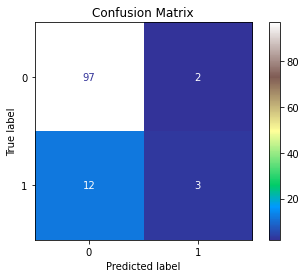

In [34]:
plot_confusion_matrix(ada, Z_test, y_test, cmap='terrain')
plt.title('Confusion Matrix', fontdict = {'fontsize':12});

In [35]:
tn, tp, fn, fp = confusion_matrix(y_test, preds).ravel()

metrics.accuracy_score(y_test, preds)
print(f'Accuracy score is: {metrics.accuracy_score(y_test, preds)}'),
print(f'Precision score is: {metrics.precision_score(y_test, preds)}'),
print(f'Recall score is: {metrics.recall_score(y_test, preds)}'),
print(f'Specificity score is: {tn / (tn + fp)}')

Accuracy score is: 0.8771929824561403
Precision score is: 0.6
Recall score is: 0.2
Specificity score is: 0.97


### LogReg - Z_train

In [36]:
lr = LogisticRegression(max_iter=1000, solver='liblinear')

lr.fit(Z_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [37]:
f'Test CV: {cross_val_score(lr, Z_test, y_test).mean()}', f'Train CV: {cross_val_score(lr, Z_train, y_train).mean()}'

('Test CV: 0.7723320158102768', 'Train CV: 0.7999999999999999')

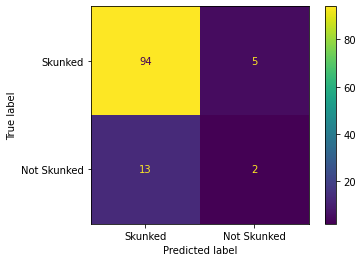

In [38]:
plot_confusion_matrix(lr, Z_test, y_test, display_labels = ['Skunked', 'Not Skunked']);

## LogReg

In [39]:
lr = LogisticRegression(max_iter=1000, solver='liblinear')

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [40]:
lr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [41]:
lr.predict_proba(X_test)[:, 1]

array([9.93417604e-04, 9.31745643e-04, 1.77410257e-01, 3.18342164e-01,
       6.05052791e-05, 7.31419470e-04, 3.20428363e-01, 1.28768605e-01,
       3.14878001e-05, 9.92655563e-01, 1.07745852e-01, 3.65670065e-01,
       4.10615182e-02, 2.19204922e-02, 3.21059515e-02, 2.45826031e-04,
       3.62271008e-02, 8.62956993e-01, 9.49838001e-05, 1.33669016e-02,
       4.98511696e-03, 2.50000772e-02, 9.98914230e-01, 7.77068109e-06,
       6.30388037e-01, 6.71054760e-02, 4.98511696e-03, 9.07490446e-01,
       3.28280183e-09, 9.64359826e-01, 7.08700680e-04, 2.12956087e-01,
       1.69320197e-01, 3.11151872e-05, 1.26793536e-01, 4.98511696e-03,
       1.35691934e-02, 3.18342164e-01, 4.28511702e-03, 4.98511696e-03,
       1.06631400e-01, 3.11217608e-02, 3.30002189e-01, 4.98511696e-03,
       6.05052791e-05, 4.98511696e-03, 1.57880567e-02, 4.69471285e-01,
       3.18342164e-01, 9.99993554e-01, 2.31776774e-01, 9.15076295e-04,
       2.12956087e-01, 8.63991713e-01, 1.13915870e-02, 9.64359826e-01,
      

In [42]:
f'Test CV: {cross_val_score(lr, X_test, y_test).mean()}', f'Train CV: {cross_val_score(lr, X_train, y_train).mean()}'

('Test CV: 0.8770750988142291', 'Train CV: 0.8147058823529412')

In [43]:
lr.score(X_train, y_train)

0.9382352941176471

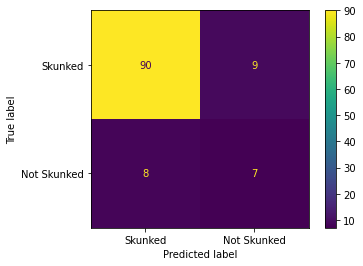

In [44]:
plot_confusion_matrix(lr, X_test, y_test, display_labels = ['Skunked', 'Not Skunked']);

In [45]:
df1.corr()['skunked'].sort_values()

month                         -0.170717
water_temp_f                  -0.145319
general_loc_diamond           -0.085083
weather_hazy                  -0.074618
wind_dir_se                   -0.068473
weather_raining               -0.067846
weather_no_weather_recorded   -0.062877
general_loc_sandy             -0.059700
weather_windy                 -0.057664
air_temp_f                    -0.047193
general_loc_wolfboro bay      -0.035116
weather_sunny                 -0.030681
general_loc_varney            -0.028640
general_loc_birch             -0.028640
general_loc_carr point        -0.028640
general_loc_weirs marina      -0.028640
wind_dir_sw                   -0.026374
general_loc_witches           -0.025328
general_loc_tip witches       -0.020229
wind_dir_ene                  -0.020229
general_loc_long island       -0.020229
wind_dir_nw                   -0.018827
general_loc_lockes            -0.014953
general_loc_harilla bay       -0.014138
wind_speed_mph                -0.010868


In [46]:
df[['skunked', 'hour', 'water_depth_ft', 'duration_min']]

,skunked,hour,water_depth_ft,duration_min
0,False,6,20.0,160.0
1,False,7,20.0,160.0
2,False,7,20.0,160.0
3,False,8,37.0,160.0
4,False,7,43.0,195.0
...,...,...,...,...
449,False,15,10.0,240.0
450,True,0,0.0,135.0
451,False,12,10.0,240.0
452,False,12,15.0,210.0


## Random Forest

In [47]:
rf = RandomForestClassifier()
# X_train, X_test_gs, y_train, y_test_gs = train_test_split(X,y, test_size = .1, random_state = 33)
params = {
    'max_depth': [7,11,12,13],
    'max_features': [5,6,7,8],
    'min_samples_split': [2,3,4, 7,9],
    'n_estimators': [10,13,20,23,26,30,33] 
    }

gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, verbose=0)
gs.fit(Z_train, y_train)
print(gs.best_score_)
gs.best_params_, 
# gs.score(X_test, y_test), gs.score(X_train, y_train)

0.8411764705882353


({'max_depth': 7,
  'max_features': 5,
  'min_samples_split': 2,
  'n_estimators': 33},)

In [48]:
f'Test CV: {cross_val_score(gs, X_test, y_test).mean()}', f'Train CV: {cross_val_score(gs, X_train, y_train).mean()}'

('Test CV: 0.8770750988142291', 'Train CV: 0.838235294117647')

In [49]:
# plot_confusion_matrix(stack, X_test, y_test, display_labels = ['Skunked', 'Not Skunked']);

## Stacking

In [50]:
estimators = [('rf', RandomForestClassifier(n_estimators=20, max_depth=13, max_features=5, min_samples_split=2, random_state=42)),
              ('knn', make_pipeline(StandardScaler(),KNeighborsClassifier())),
             ('bag', BaggingClassifier()),
             ('ridge', make_pipeline(StandardScaler(),RidgeClassifier()))]

stack = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())

In [51]:
stack.fit(X_train, y_train)
stack.score(X_train, y_train), stack.score(X_test, y_test), cross_val_score(stack, X_train, y_train).mean()

(0.9205882352941176, 0.8859649122807017, 0.8323529411764706)

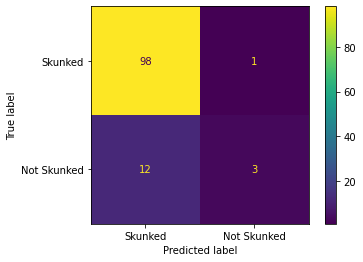

In [52]:
plot_confusion_matrix(stack, X_test, y_test, display_labels = ['Skunked', 'Not Skunked']);

In [53]:
# Baseline
y.value_counts(normalize=True)

0    0.843612
1    0.156388
Name: skunked, dtype: float64